# Random Forest

on the penguin dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


### Preparations

In [10]:
# let's bring in the data and get rid of the Nans

df = pd.read_csv('./data/train.csv')
# df.dropna(inplace=True)

#### 1. Inspect the size of the dataset

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

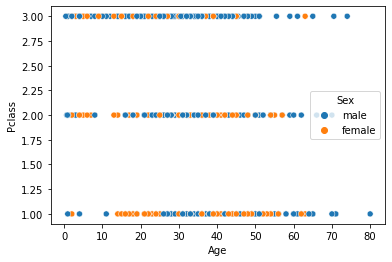

In [13]:
# sns.scatterplot(x=df['Age'], y=df['Pclass'], hue=df['Sex'])Second ways to do the same!

sns.scatterplot(x='Age', y='Pclass', hue='Sex', data= df) 


In [14]:
y = df['Survived']
X = df[['Pclass', 'Age', 'Sex' ]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
X_train.shape, X_test.shape

((668, 3), (223, 3))

In [17]:
X_train.head()

,Pclass,Age,Sex
857,1,51.0,male
313,3,28.0,male
610,3,39.0,female
386,3,1.0,male
359,3,NaN,female


## pipline

In [18]:
impute_and_MinMaxScaler = make_pipeline(
    SimpleImputer(strategy='most_frequent'), 
    MinMaxScaler()
)

## Column Transformer

In [19]:
fe = ColumnTransformer([
    # (name, transformer, column-names)
    # ('do-nothing', 'passthrough', ['culmen_length_mm', 'body_mass_g']),
    
    ('imputation, scaling', impute_and_MinMaxScaler, ['Age']),
#     ('imputation', SimpleImputer(), ['Age']),
#     ('binning', KBinsDiscretizer(n_bins=3, encode='onehot-dense'), ['Sex']),
    ('one-hot-encode', OneHotEncoder(), ['Sex', 'Pclass']),
#     ('one-hot', OneHotEncoder, ['Age']),
    
    # DON'T DO THIS:
    # ('one-hot-encode', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['body_mass_g'])
])

fe

ColumnTransformer(transformers=[('imputation, scaling',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age']),
                                ('one-hot-encode', OneHotEncoder(),
                                 ['Sex', 'Pclass'])])

In [20]:
fe.fit(X_train)

# transform the training data
X_train_trans = fe.transform(X_train)
pd.DataFrame(X_train_trans)

,0,1,2,3,4,5
0,0.635587,0.0,1.0,1.0,0.0,0.0
1,0.346569,0.0,1.0,0.0,0.0,1.0
2,0.484795,1.0,0.0,0.0,0.0,1.0
3,0.007288,0.0,1.0,0.0,0.0,1.0
4,0.220910,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
663,0.258608,0.0,1.0,0.0,0.0,1.0
664,0.246042,0.0,1.0,0.0,0.0,1.0
665,0.497361,0.0,1.0,0.0,0.0,1.0
666,0.447097,1.0,0.0,0.0,1.0,0.0


## Find the optimal separation with Scikit

#### 7. Train the model

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:

# initialize and train model
# m = DecisionTreeClassifier(max_depth=2)
m= RandomForestClassifier(
      n_estimators=100,   # number of decision trees in the forest
      max_depth=4        # depth of each tree
)

m.fit(X_train_trans, y_train)

RandomForestClassifier(max_depth=4)

## predictions

In [23]:
y_pred_train = m.predict(X_train_trans)
accuracy_score(y_train, y_pred_train)

0.8488023952095808

#### Calculate the accuracy

In [24]:
m.classes_

array([0, 1])

In [27]:
titanic_kaggel = pd.read_csv('./data/test.csv', index_col = 0)
titanic_kaggel.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
X_kaggel = titanic_kaggel[['Pclass', 'Age', 'Sex']]
X_kaggel_trans = fe.transform(X_kaggel)

In [29]:
y_pred_kaggel = m.predict(X_kaggel_trans)
type(y_pred_kaggel)

numpy.ndarray

In [30]:

submission = pd.DataFrame(y_pred_kaggel, index=X_kaggel.index, columns = ['Survived'])


submission.to_csv('submission3.csv', index=True)

submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [27]:
# plt.figure(figsize=(10, 12))
# t = plot(m, feature_names=['Age','female', 'male', 'class1', 'class2','class3'], class_names=['Non_survived','Survived'])

In [28]:
fe.named_transformers_['one-hot-encode'].get_feature_names()

array(['x0_female', 'x0_male', 'x1_1', 'x1_2', 'x1_3'], dtype=object)